In [1]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import pandas as pd

df = pd.read_csv('Data\한국가스공사_시간별 공급량_20181231.csv', encoding='euckr')

In [3]:
import matplotlib as plt
plt.rcParams["font.family"] = 'Malgun Gothic'

In [4]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [5]:
print(df['구분'].unique())
print(df['구분'].nunique())

['A' 'B' 'C' 'D' 'E' 'G' 'H']
7


In [6]:
df.groupby('구분')['공급량'].count().reset_index()

,구분,공급량
0,A,52584
1,B,52584
2,C,52584
3,D,52584
4,E,52584
5,G,52584
6,H,52584


In [7]:
df.shape

(368088, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [9]:
print(f"최대 공급량: {df['공급량'].max()}, 최소 공급량: {df['공급량'].min()}")

print(f"최대 년월일: {df['연월일'].max()}, 최소 년월일: {df['연월일'].min()}")

최대 공급량: 11593.617, 최소 공급량: 1.378
최대 년월일: 2018-12-31, 최소 년월일: 2013-01-01


<AxesSubplot:>

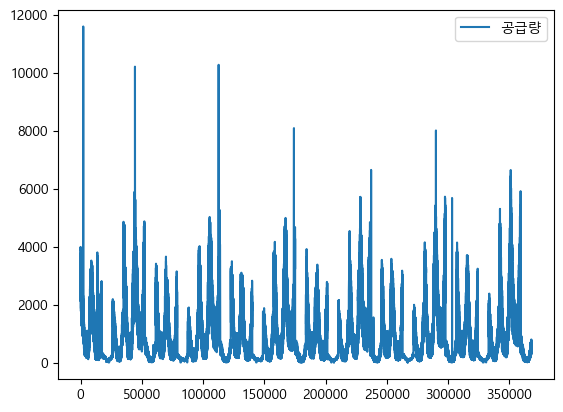

In [10]:
df[['공급량']].plot()

In [11]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [12]:
df

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연월일     368088 non-null  object 
 1   시간      368088 non-null  int64  
 2   구분      368088 non-null  object 
 3   공급량     368088 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [28]:
df['시간'] = df['시간'] -1

In [29]:
df['시간'] = df['시간'].apply(lambda x: f'{x:02d}')

df

,연월일,시간,구분,공급량
0,2013-01-01,00,A,2497.129
1,2013-01-01,01,A,2363.265
2,2013-01-01,02,A,2258.505
3,2013-01-01,03,A,2243.969
4,2013-01-01,04,A,2344.105
...,...,...,...,...
368083,2018-12-31,19,H,681.033
368084,2018-12-31,20,H,669.961
368085,2018-12-31,21,H,657.941
368086,2018-12-31,22,H,610.953


In [30]:
df['시간'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [31]:
df['date'] = pd.to_datetime(df['연월일'] + ' ' + df['시간'], format=('%Y-%m-%d %H'))

df

,연월일,시간,구분,공급량,date
0,2013-01-01,00,A,2497.129,2013-01-01 00:00:00
1,2013-01-01,01,A,2363.265,2013-01-01 01:00:00
2,2013-01-01,02,A,2258.505,2013-01-01 02:00:00
3,2013-01-01,03,A,2243.969,2013-01-01 03:00:00
4,2013-01-01,04,A,2344.105,2013-01-01 04:00:00
...,...,...,...,...,...
368083,2018-12-31,19,H,681.033,2018-12-31 19:00:00
368084,2018-12-31,20,H,669.961,2018-12-31 20:00:00
368085,2018-12-31,21,H,657.941,2018-12-31 21:00:00
368086,2018-12-31,22,H,610.953,2018-12-31 22:00:00


In [32]:
df.index = pd.DatetimeIndex(df['date'])

In [19]:
df

,연월일,시간,구분,공급량,date
date,,,,,
2013-01-01 00:00:00,2013-01-01,00,A,2497.129,2013-01-01 00:00:00
2013-01-01 01:00:00,2013-01-01,01,A,2363.265,2013-01-01 01:00:00
2013-01-01 02:00:00,2013-01-01,02,A,2258.505,2013-01-01 02:00:00
2013-01-01 03:00:00,2013-01-01,03,A,2243.969,2013-01-01 03:00:00
2013-01-01 04:00:00,2013-01-01,04,A,2344.105,2013-01-01 04:00:00
...,...,...,...,...,...
2018-12-31 19:00:00,2018-12-31,19,H,681.033,2018-12-31 19:00:00
2018-12-31 20:00:00,2018-12-31,20,H,669.961,2018-12-31 20:00:00
2018-12-31 21:00:00,2018-12-31,21,H,657.941,2018-12-31 21:00:00


In [33]:
df = df.drop(columns=['연월일', '시간', 'date'], axis=1)

df

,구분,공급량
date,,
2013-01-01 00:00:00,A,2497.129
2013-01-01 01:00:00,A,2363.265
2013-01-01 02:00:00,A,2258.505
2013-01-01 03:00:00,A,2243.969
2013-01-01 04:00:00,A,2344.105
...,...,...
2018-12-31 19:00:00,H,681.033
2018-12-31 20:00:00,H,669.961
2018-12-31 21:00:00,H,657.941


In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = df.reset_index()

In [36]:
df

,date,구분,공급량
0,2013-01-01 00:00:00,A,2497.129
1,2013-01-01 01:00:00,A,2363.265
2,2013-01-01 02:00:00,A,2258.505
3,2013-01-01 03:00:00,A,2243.969
4,2013-01-01 04:00:00,A,2344.105
...,...,...,...
368083,2018-12-31 19:00:00,H,681.033
368084,2018-12-31 20:00:00,H,669.961
368085,2018-12-31 21:00:00,H,657.941
368086,2018-12-31 22:00:00,H,610.953


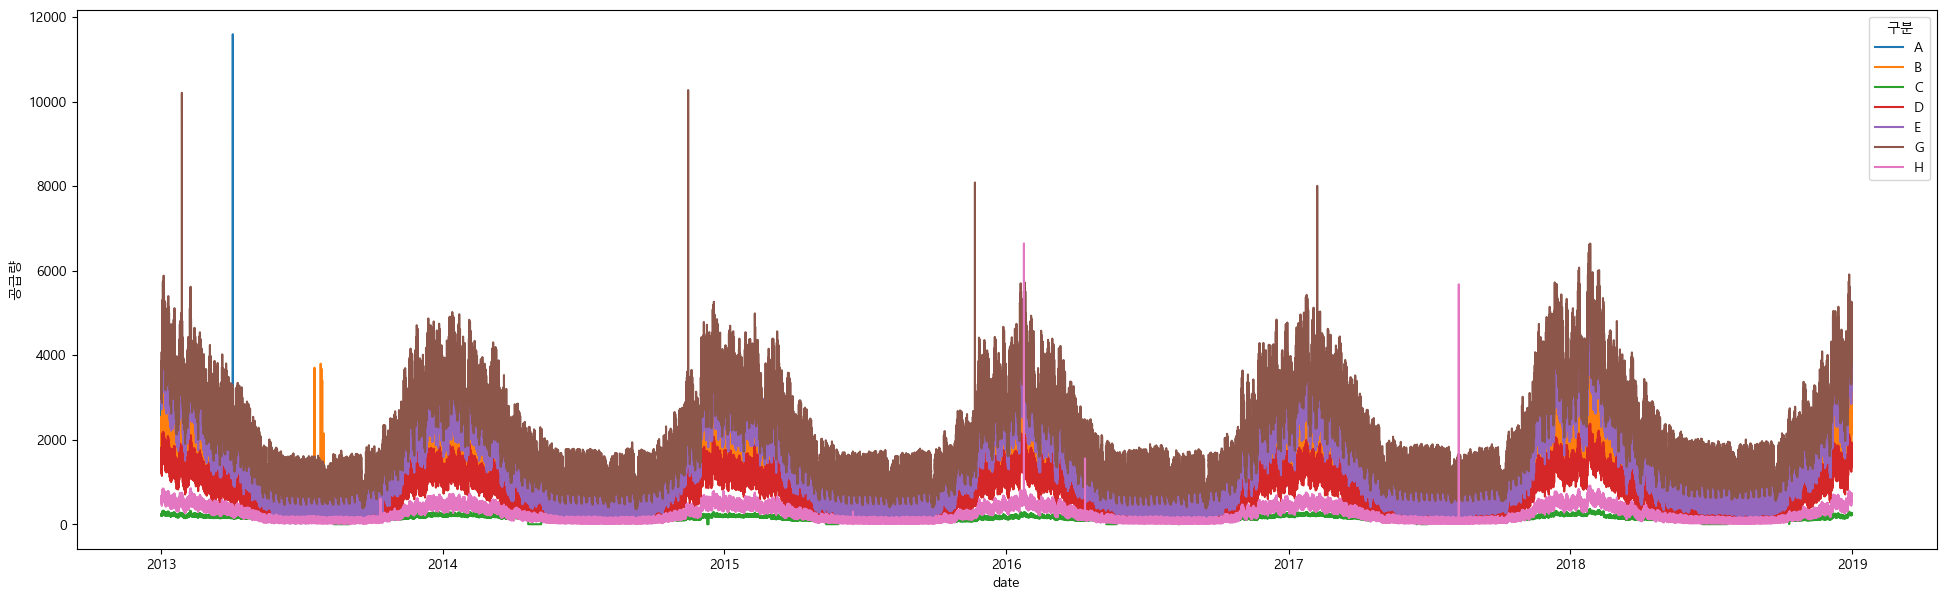

In [37]:
plt.figure(figsize=(24, 7))
sns.lineplot(x=df['date'], y=df['공급량'], data=df, hue=df['구분'])
sns.set(style='white')


In [42]:
df['공급량'].describe()

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64

In [81]:
df.describe()['공급량']

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64

In [80]:
df['공급량'].describe()

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64

In [82]:
def IQR(df, col):
    describe = df.describe()[col]
    Q1 = describe['25%']
    Q3 = describe['75%']
    iqr = Q3 - Q1
    outlier = Q3 + iqr*3
    return outlier

In [88]:
def plot_df(df, company_code):
    print(f"{df['공급량'].describe()}")
    outlier = IQR(df[df['구분'] == company_code], '공급량')
    
    fig, ax = plt.subplots(1, 1, figsize=(18, 7))
    sns.lineplot(x='date', y='공급량', data=df[df['구분'] == company_code], ax=ax).axhline(y=outlier, color='red')
    plt.show()

In [89]:
df[df['구분'] == 'A']

,date,구분,공급량
0,2013-01-01 00:00:00,A,2497.129
1,2013-01-01 01:00:00,A,2363.265
2,2013-01-01 02:00:00,A,2258.505
3,2013-01-01 03:00:00,A,2243.969
4,2013-01-01 04:00:00,A,2344.105
...,...,...,...
315523,2018-12-31 19:00:00,A,3040.868
315524,2018-12-31 20:00:00,A,2973.577
315525,2018-12-31 21:00:00,A,2840.272
315526,2018-12-31 22:00:00,A,2692.385


count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


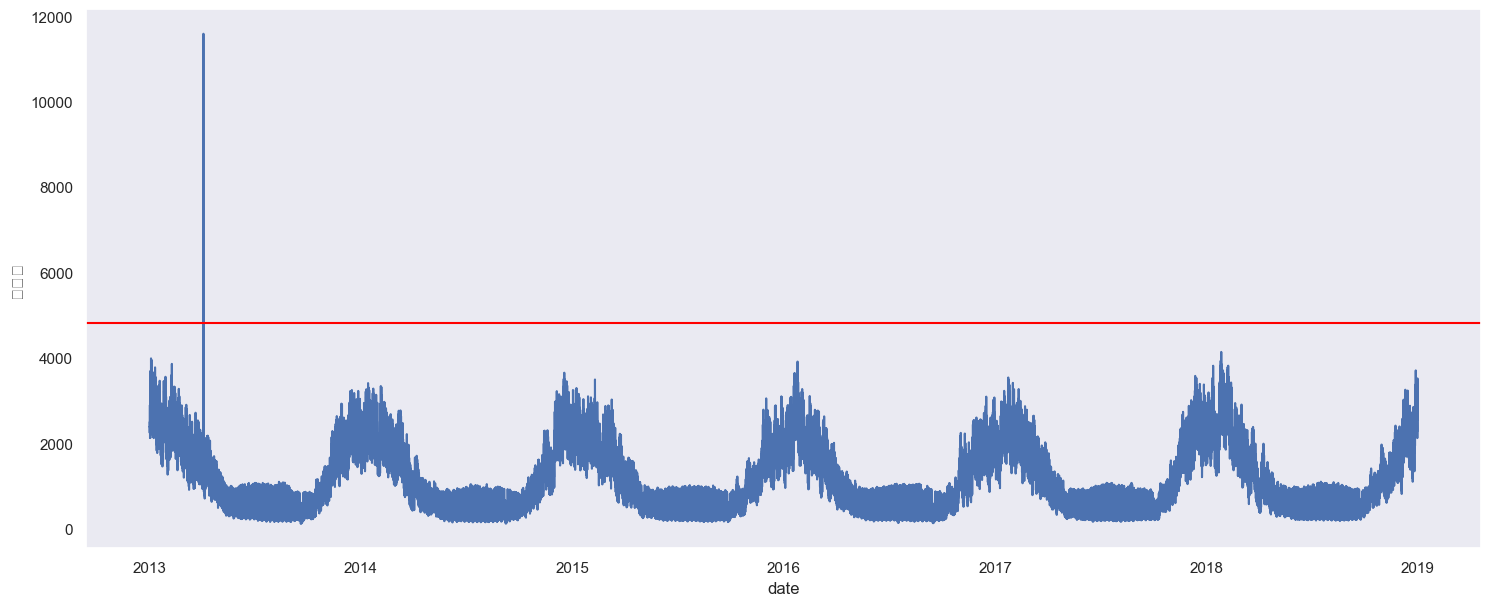

In [90]:
plot_df(df, 'A')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


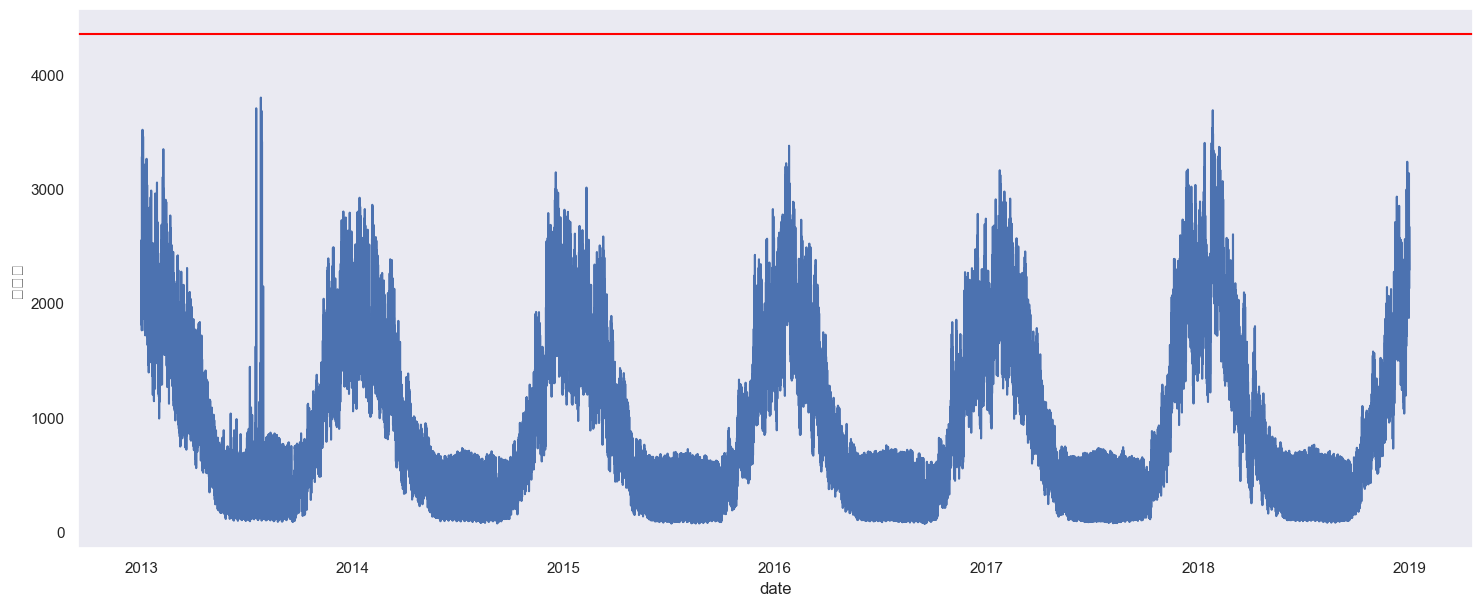

In [91]:
plot_df(df, 'B')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


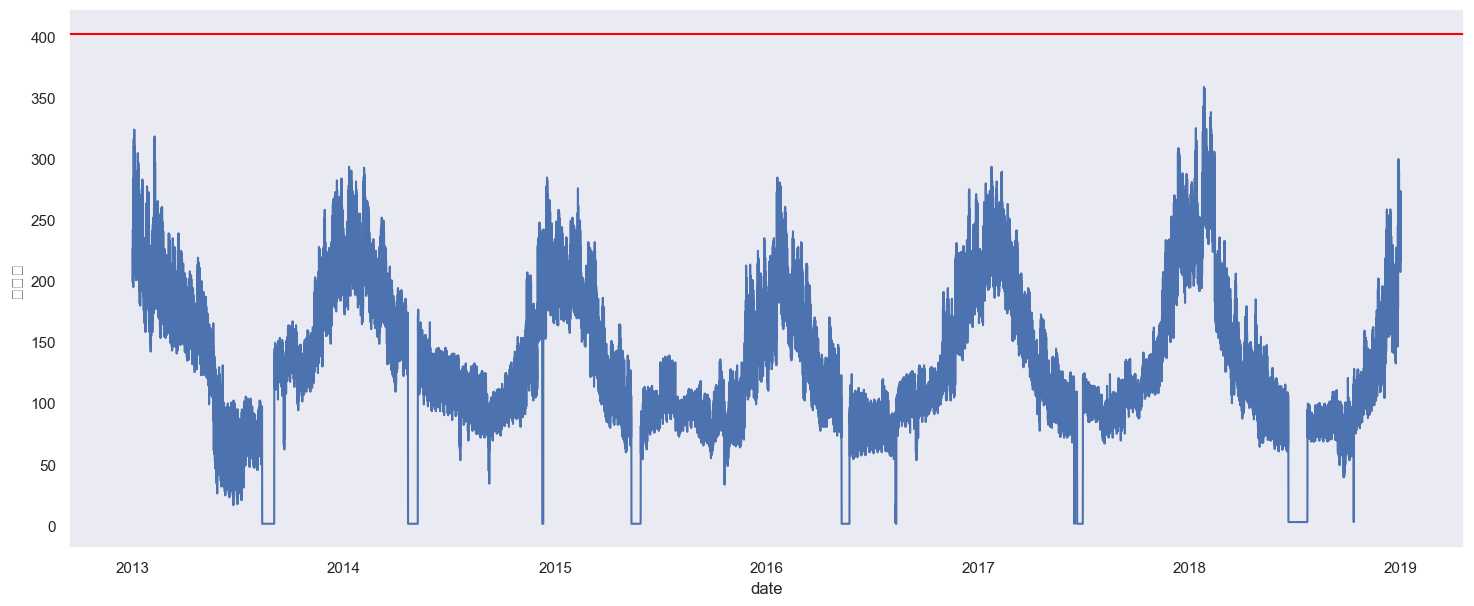

In [92]:
plot_df(df, 'C')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


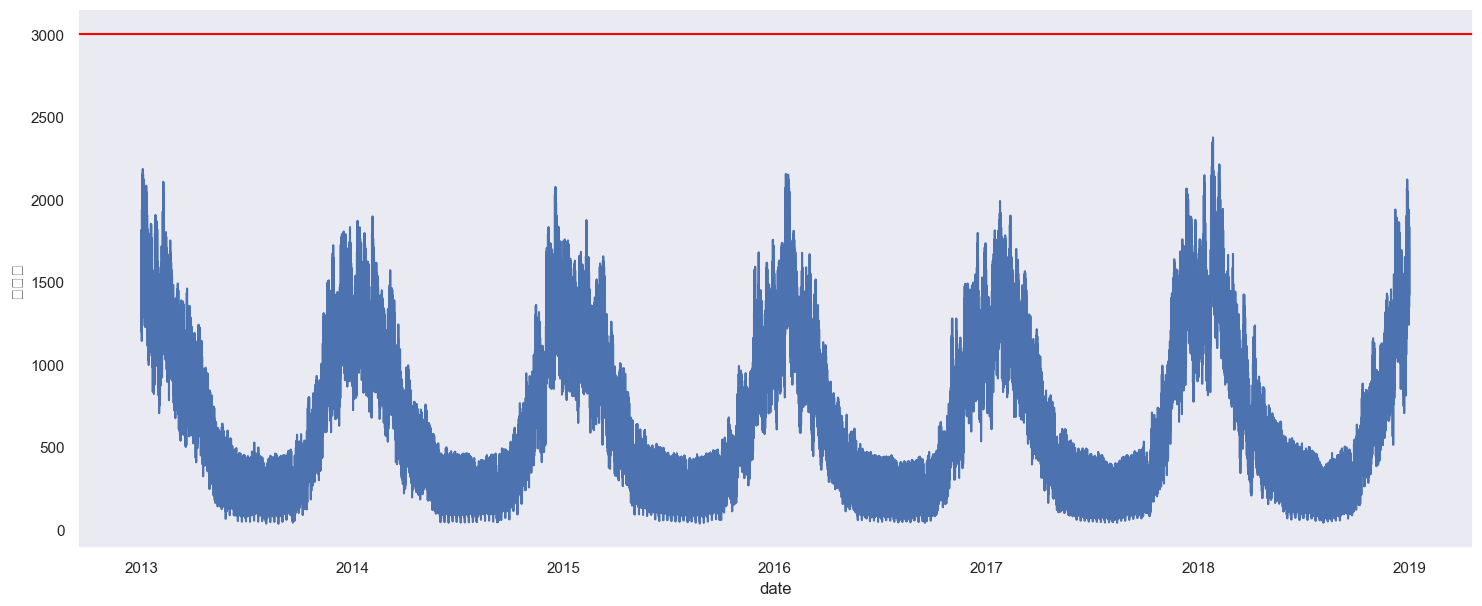

In [93]:
plot_df(df, 'D')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


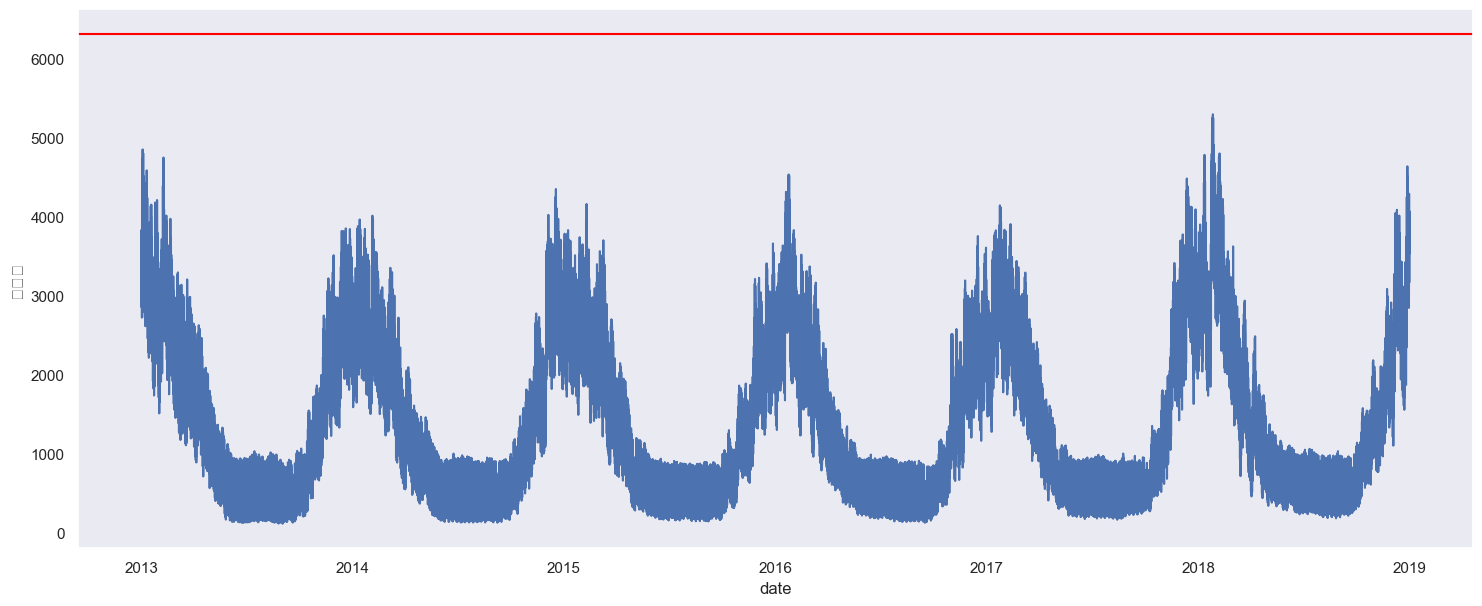

In [94]:
plot_df(df, 'E')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


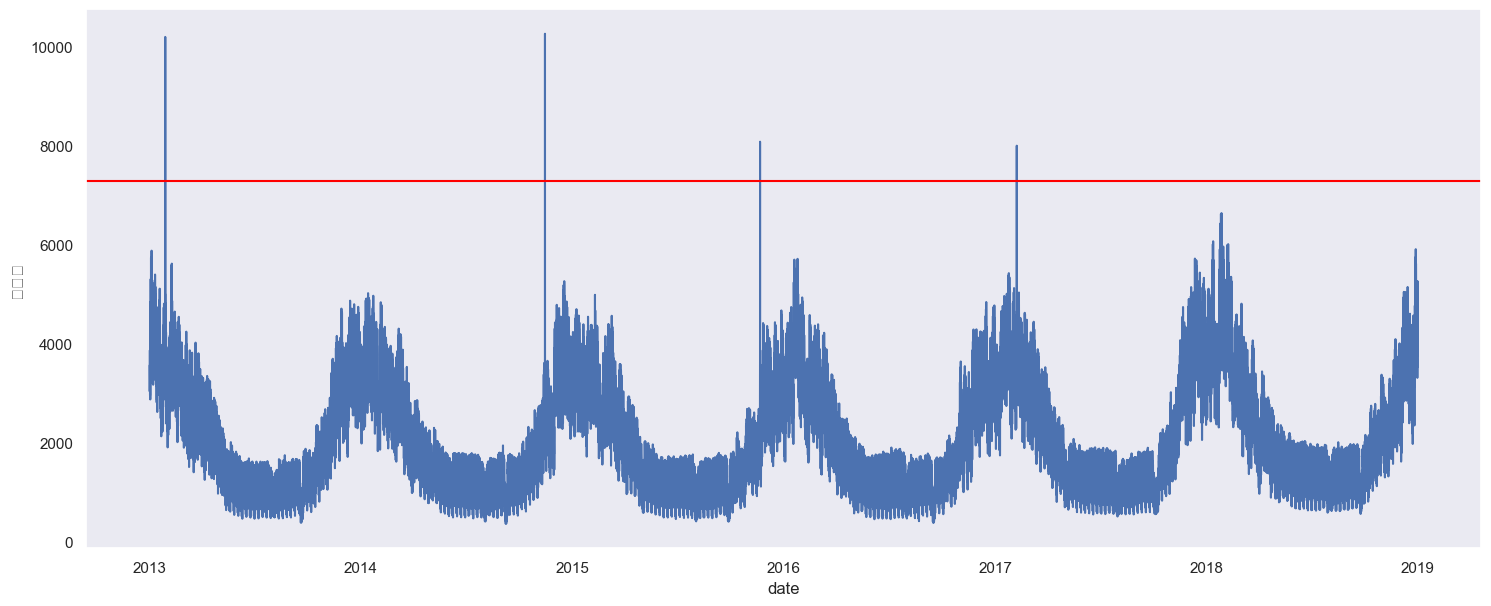

In [95]:
plot_df(df, 'G')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


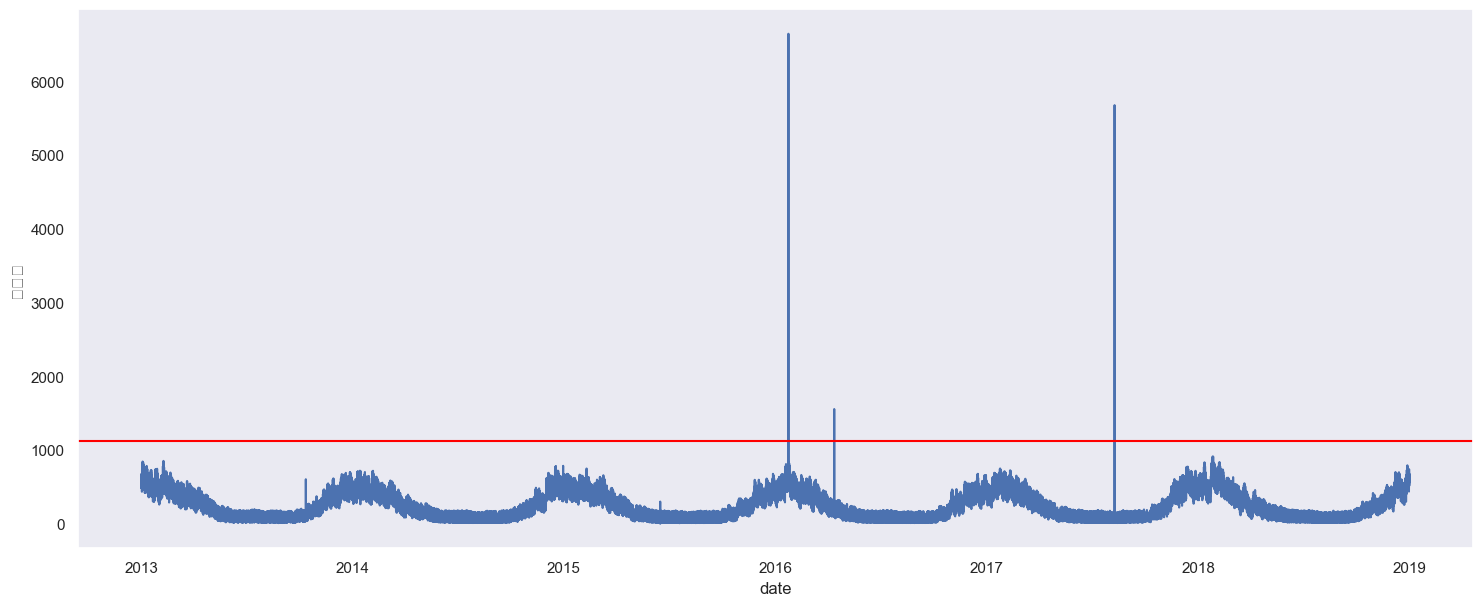

In [96]:
plot_df(df, 'H')

In [97]:
df

,date,구분,공급량
0,2013-01-01 00:00:00,A,2497.129
1,2013-01-01 01:00:00,A,2363.265
2,2013-01-01 02:00:00,A,2258.505
3,2013-01-01 03:00:00,A,2243.969
4,2013-01-01 04:00:00,A,2344.105
...,...,...,...
368083,2018-12-31 19:00:00,H,681.033
368084,2018-12-31 20:00:00,H,669.961
368085,2018-12-31 21:00:00,H,657.941
368086,2018-12-31 22:00:00,H,610.953


In [100]:
tmp_df = df

tmp_df['year'] = df['date'].dt.year
tmp_df['month'] = df['date'].dt.month
tmp_df['day'] = df['date'].dt.day


In [101]:
tmp_df

,date,구분,공급량,year,month,day
0,2013-01-01 00:00:00,A,2497.129,2013,1,1
1,2013-01-01 01:00:00,A,2363.265,2013,1,1
2,2013-01-01 02:00:00,A,2258.505,2013,1,1
3,2013-01-01 03:00:00,A,2243.969,2013,1,1
4,2013-01-01 04:00:00,A,2344.105,2013,1,1
...,...,...,...,...,...,...
368083,2018-12-31 19:00:00,H,681.033,2018,12,31
368084,2018-12-31 20:00:00,H,669.961,2018,12,31
368085,2018-12-31 21:00:00,H,657.941,2018,12,31
368086,2018-12-31 22:00:00,H,610.953,2018,12,31


In [110]:
tmp_df = tmp_df.groupby([tmp_df['year'], df['month'], df['day']]).sum().reset_index()

In [111]:
tmp_df

,year,month,day,공급량
0,2013,1,1,329071.952
1,2013,1,2,392558.872
2,2013,1,3,430133.984
3,2013,1,4,422635.256
4,2013,1,5,384039.000
...,...,...,...,...
2186,2018,12,27,383718.778
2187,2018,12,28,407755.465
2188,2018,12,29,370960.691
2189,2018,12,30,353624.546


In [112]:
tmp_df[tmp_df['year'] == 2018]

,year,month,day,공급량
1826,2018,1,1,272233.299
1827,2018,1,2,311784.312
1828,2018,1,3,335074.189
1829,2018,1,4,343094.466
1830,2018,1,5,327020.528
...,...,...,...,...
2186,2018,12,27,383718.778
2187,2018,12,28,407755.465
2188,2018,12,29,370960.691
2189,2018,12,30,353624.546


In [113]:
def plot_del_outlier_df(df, company_code):
    print(f"{df.describe()['공급량']}")
    outlier = IQR(df[df['구분'] == company_code], '공급량')
    
    fig, ax = plt.subplots(1, 2, figsize=(26, 8))
    sns.lineplot(x='date', y='공급량', data=df[df['구분'] == company_code], ax=ax[0]).axhline(y=outlier, color='red')
    sns.lineplot(x='date', y='공급량', data=df[(df['구분'] == company_code) & (df['공급량'] < outlier)], ax=ax[1])
    
    return df[(df['구분'] == company_code) & (df['공급량'] < outlier)]

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


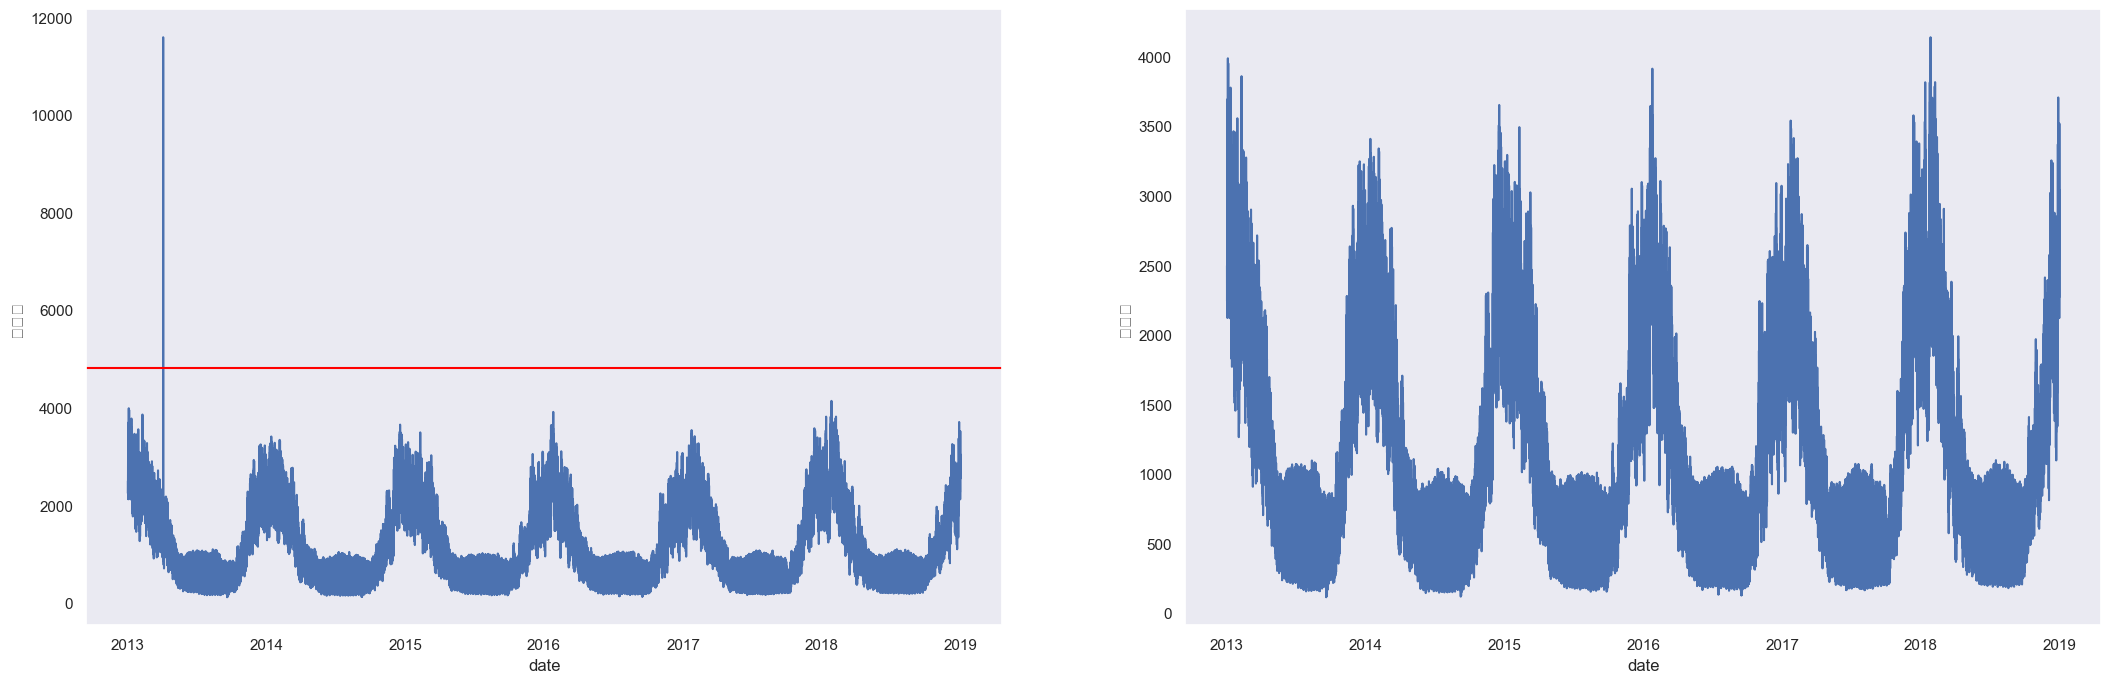

In [114]:
df_A = plot_del_outlier_df(df, 'A')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


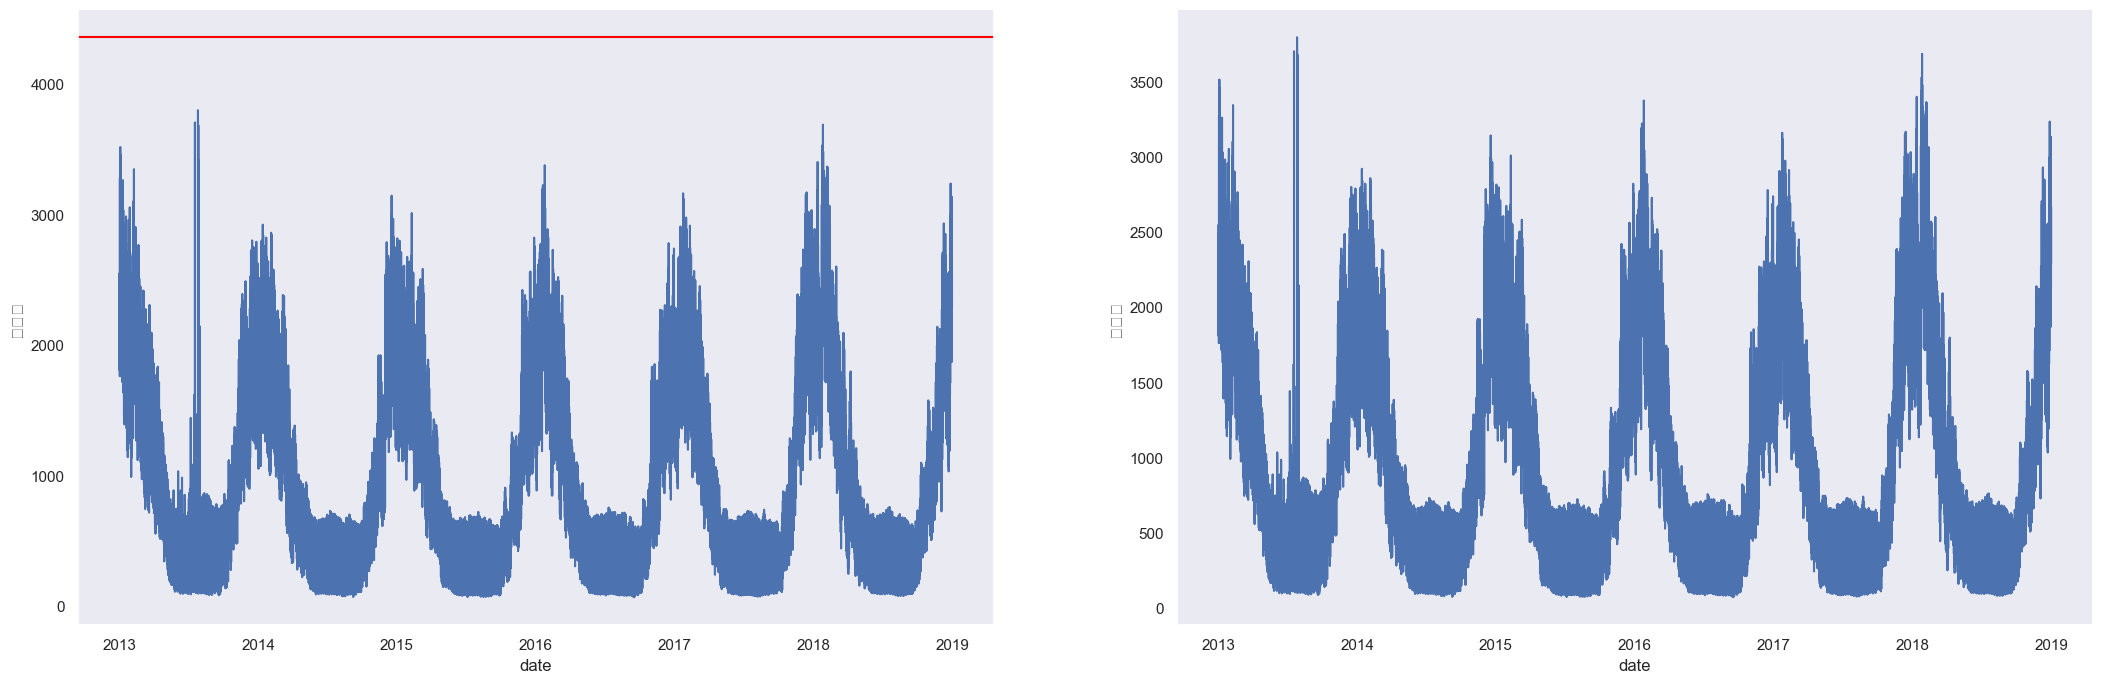

In [119]:
df_B = plot_del_outlier_df(df, 'B')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


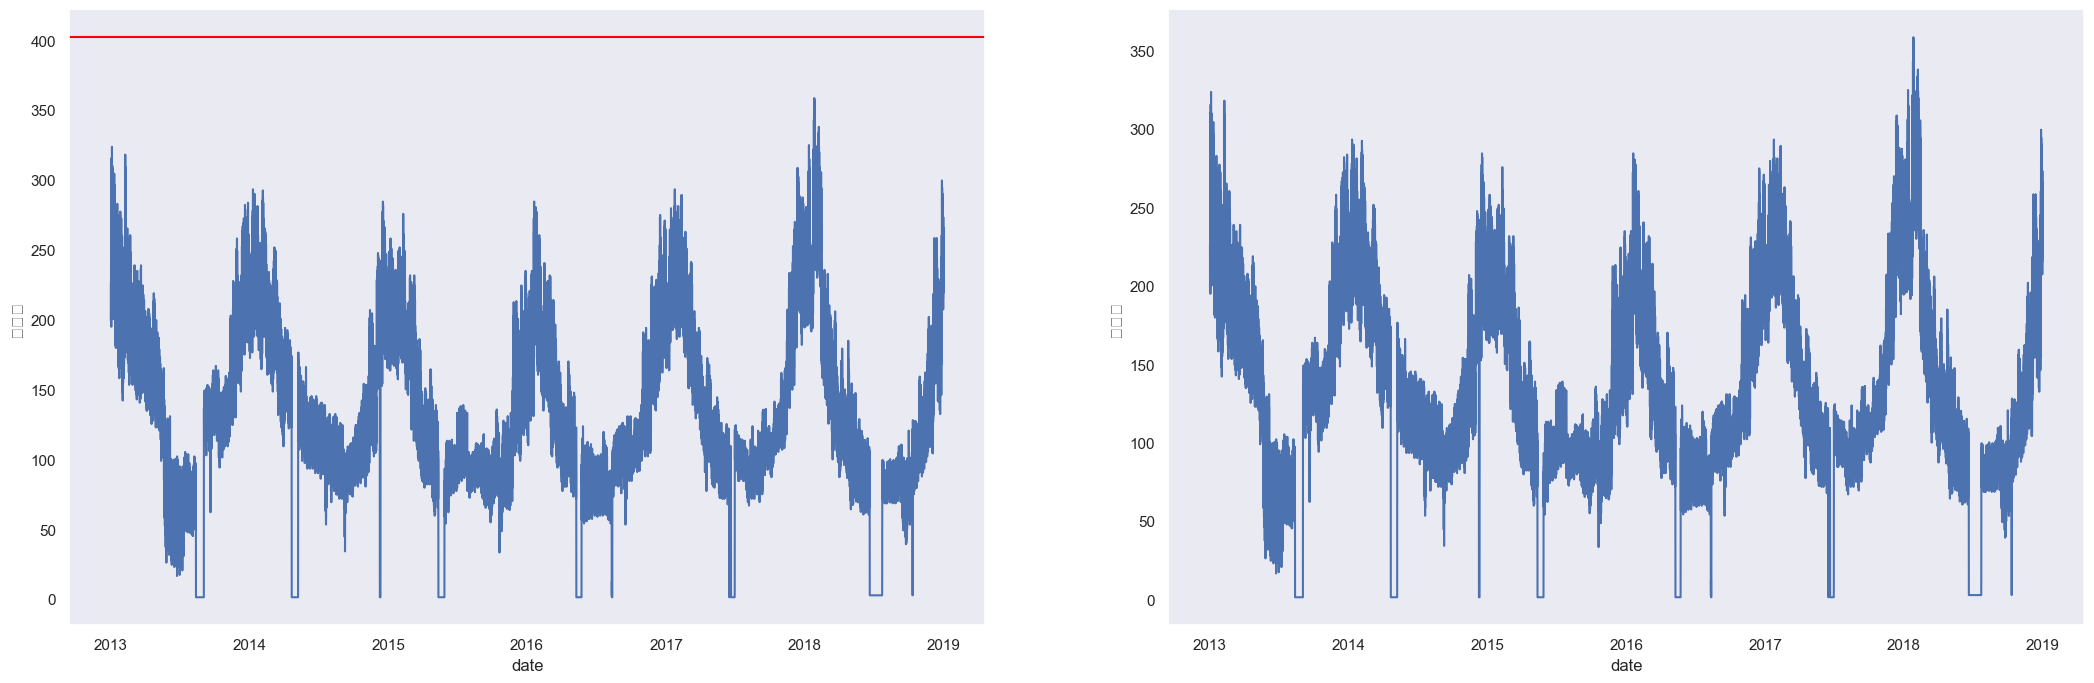

In [120]:
df_C = plot_del_outlier_df(df, 'C')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


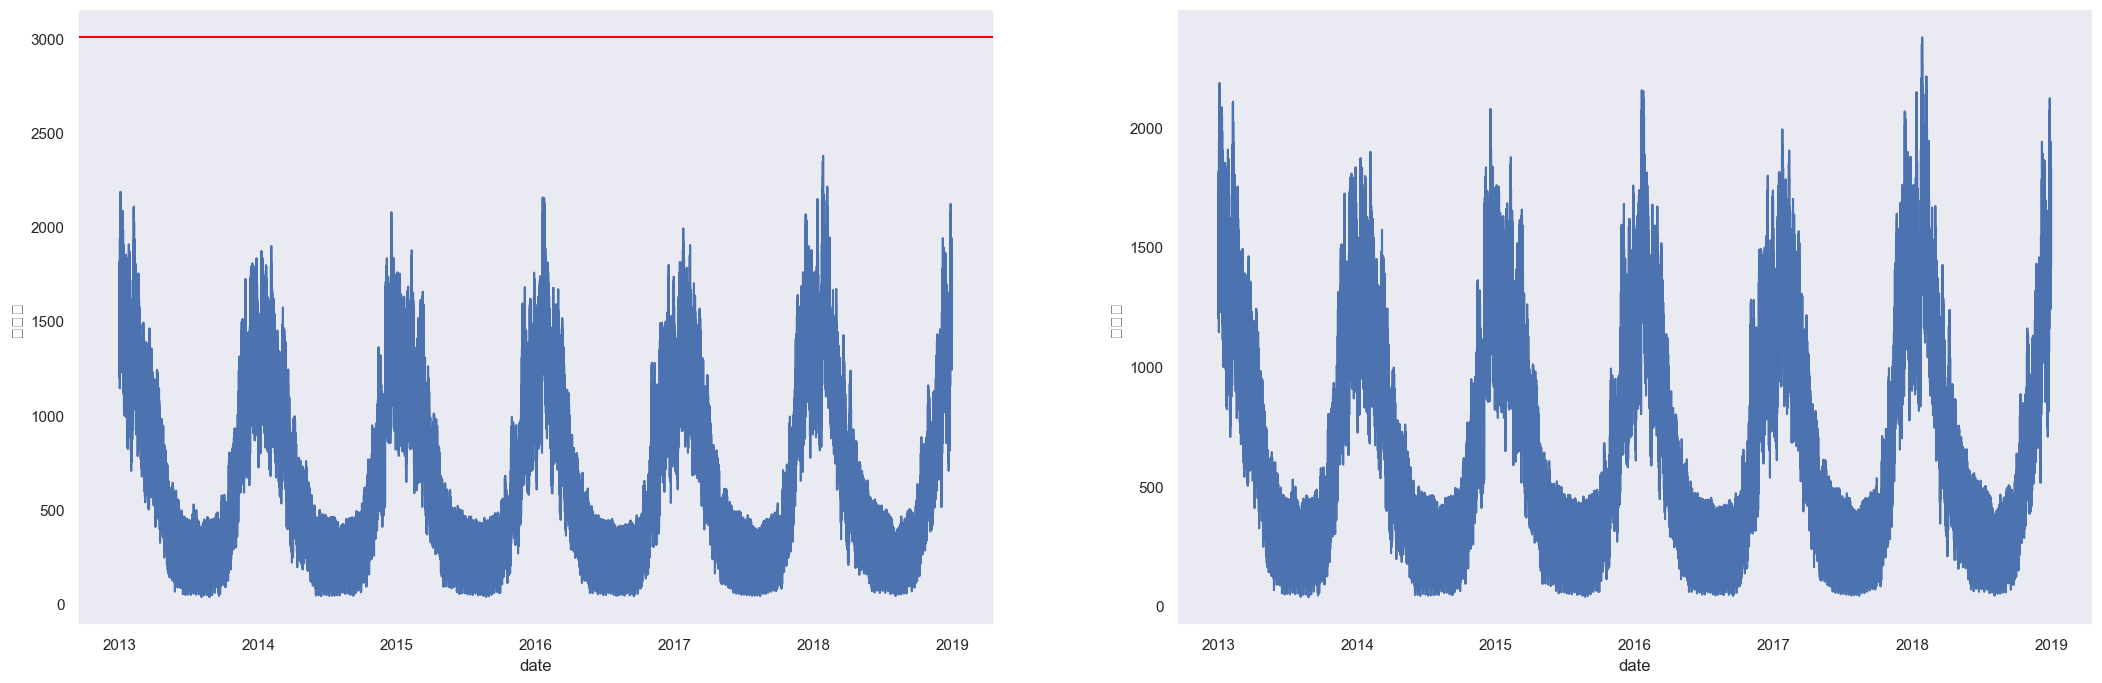

In [121]:
df_D = plot_del_outlier_df(df, 'D')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


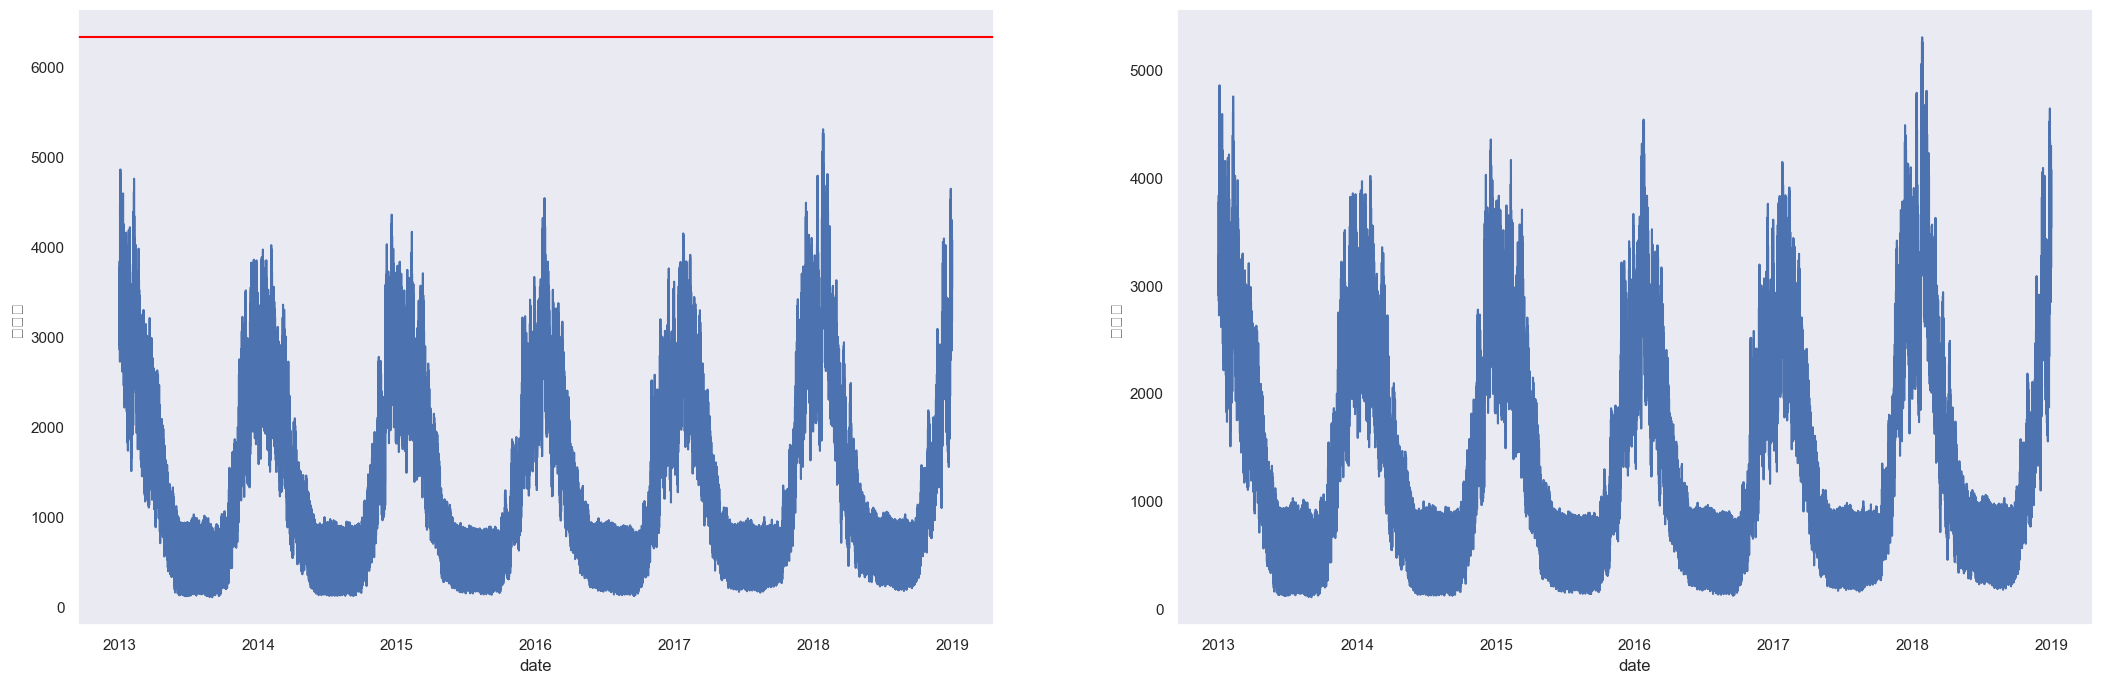

In [122]:
df_E = plot_del_outlier_df(df, 'E')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


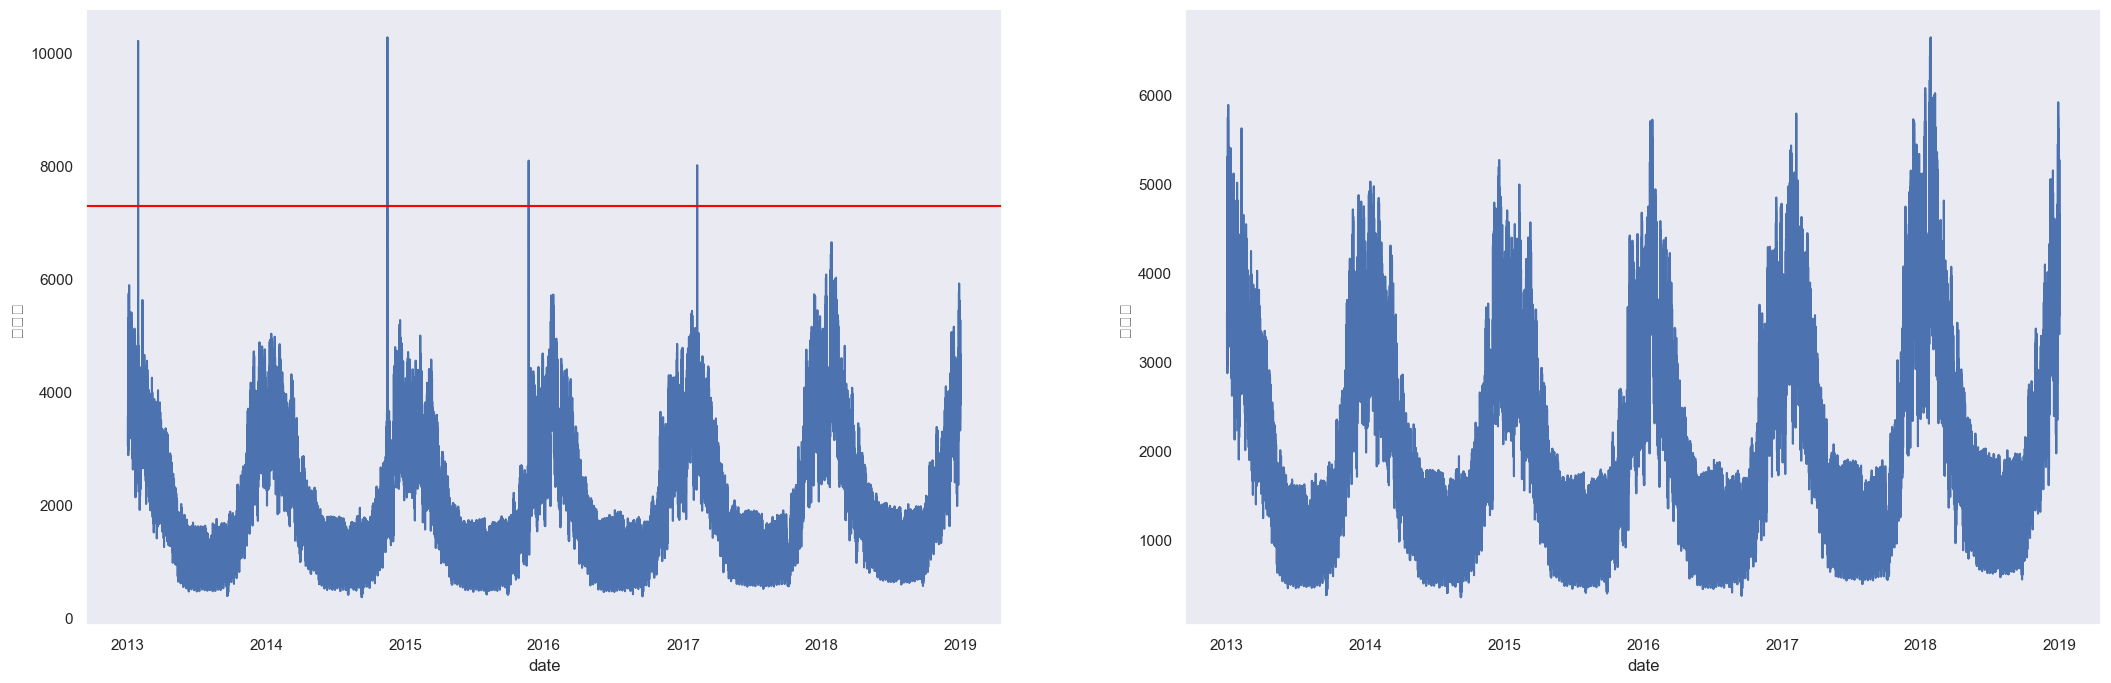

In [123]:
df_G = plot_del_outlier_df(df, 'G')

count    368088.000000
mean        948.100037
std         927.211578
min           1.378000
25%         221.973000
50%         637.014000
75%        1398.919000
max       11593.617000
Name: 공급량, dtype: float64


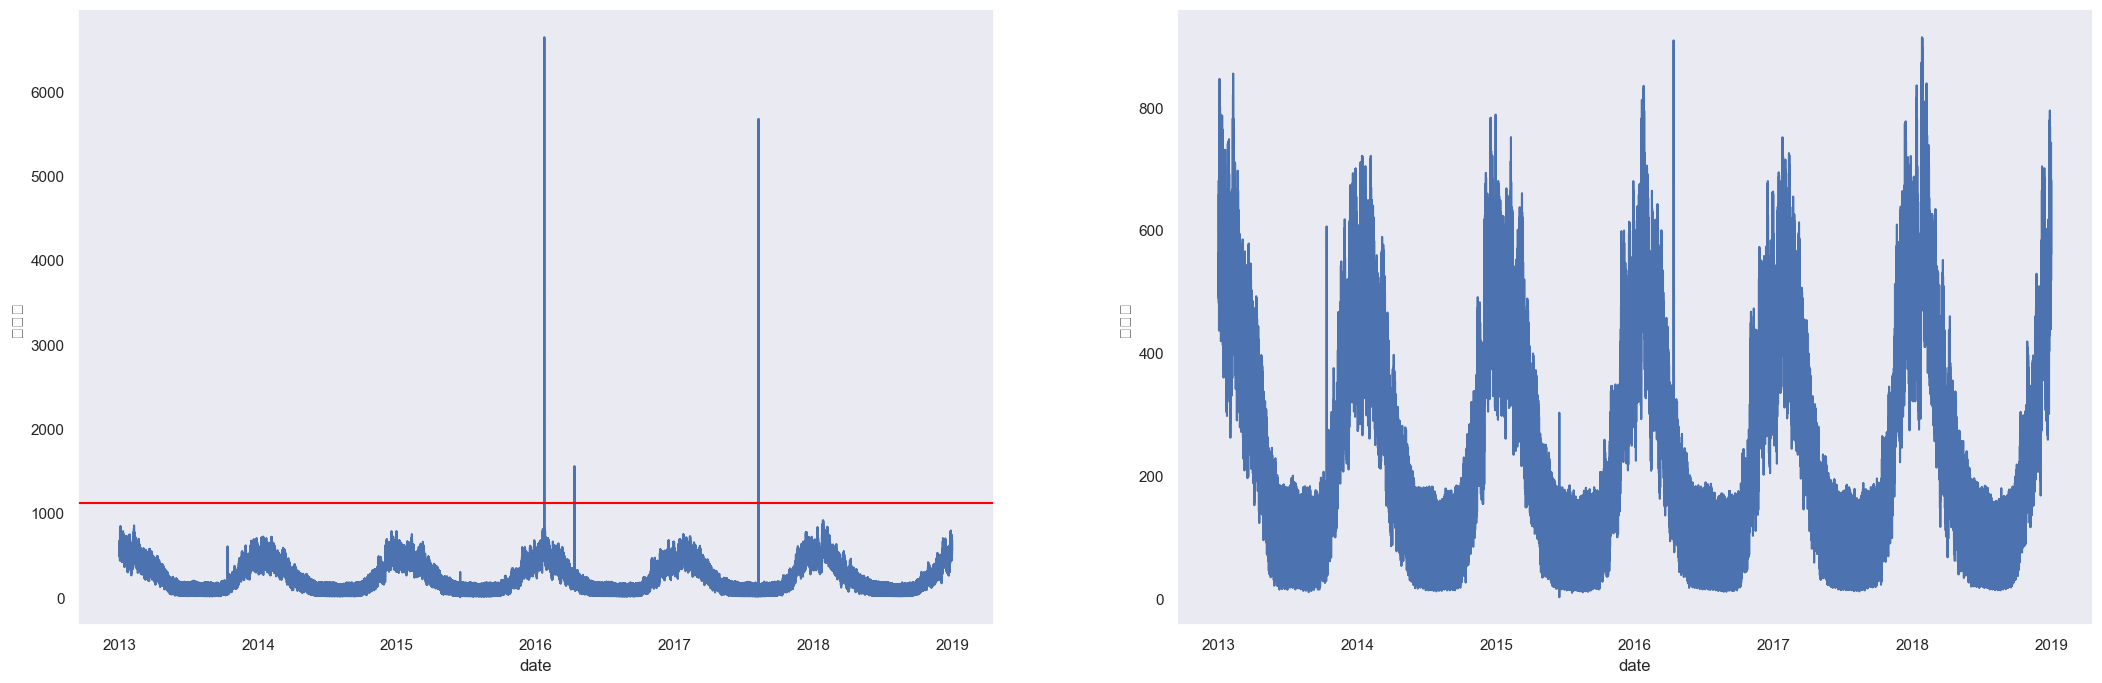

In [124]:
df_H = plot_del_outlier_df(df, 'H')

In [125]:
df_C.loc[(df_C['공급량'] < 10), '공급량'] = np.nan

df_C[['date', '공급량']].set_index('date').interpolate()

df_C

,date,구분,공급량,year,month,day
17520,2013-01-01 00:00:00,C,226.178,2013,1,1
17521,2013-01-01 01:00:00,C,215.778,2013,1,1
17522,2013-01-01 02:00:00,C,202.178,2013,1,1
17523,2013-01-01 03:00:00,C,198.978,2013,1,1
17524,2013-01-01 04:00:00,C,200.578,2013,1,1
...,...,...,...,...,...,...
333043,2018-12-31 19:00:00,C,265.980,2018,12,31
333044,2018-12-31 20:00:00,C,262.239,2018,12,31
333045,2018-12-31 21:00:00,C,256.000,2018,12,31
333046,2018-12-31 22:00:00,C,246.020,2018,12,31


count    49820.000000
mean       138.786431
std         52.055358
min         10.178000
25%         98.978000
50%        123.778000
75%        174.978000
max        358.654000
Name: 공급량, dtype: float64


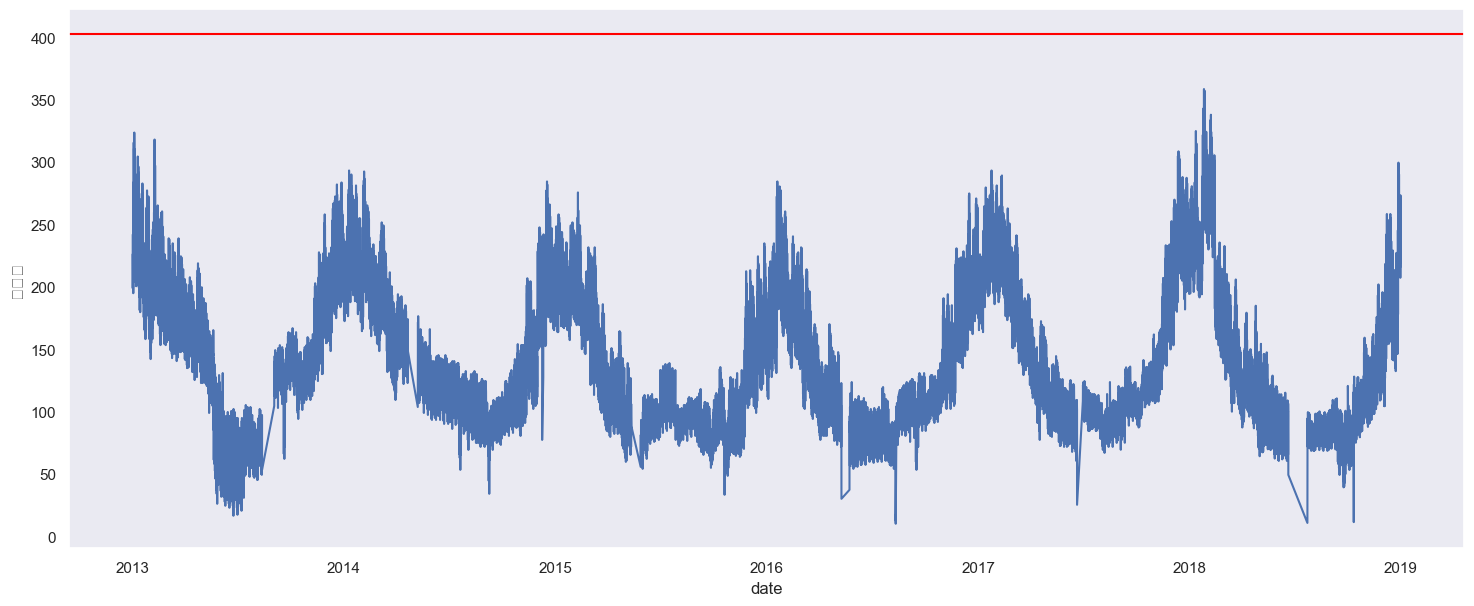

In [127]:
plot_df(df_C, 'C')

In [128]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator
from pathlib import Path
import json

In [129]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    interval = (90.0, 50.0)
    legend = ["Consumption", "observations", "median predictions"] + [f"{k}% predictions" for k in interval][::-1]
    
    fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(20, 7))
    ts_entry.plot(ax=ax)
    forecast_entry.plot(color='g')
    plt.grid(which='both')
    plt.legend(legend, loc='upper left')
    plt.show()

In [ ]:
def predict_next_year(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    df = df.groupby(['year', 'month', 'day']).sum().reset_index()
    
    train_df = df[:1826]
    test_df = df[1826:]
    
    train_ds = ListDataset([{FieldName.TARGET: train_df['공급량'].values.flatten(),
                             FieldName.START: pd.Timestamp('2013-01-01 00:00:00', freq='D')}], freq='D')
    
    test_ds = ListDataset([{FieldName.TARGET: test_df['공급량'].values.flatten(),
                             FieldName.START: pd.Timestamp('2018-01-01 00:00:00', freq='D')}], freq='D')
    
    estimator = DeepAREstimator(freq='D',
     trainer = Trainer(ctx='cpu', epochs=5, learning_rate=1E-3, hybridize=True, num_batches_per_epoch=100),
     num_layers=4,
     num_cells=40,
     context_length=360,
     cell_type='lstm',
     prediction_length=360)
    
    predictor = estimator.train(train_ds)
    
    forecast_it, tss_it = make_evaluation_predictions(
        dataset=test_ds,
        predictor=predictor,
        num_samples=10
    )
    
    forecast = list(forecast_it)
    tss = list(tss_it)
    
    forecast_entry = forecast[0]
    tss_entry = tss[0]
    
    plot_prob_forecasts(tss_entry, forecast_entry)
    
    